<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/lastproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#to import the required packages
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


%matplotlib inline

We will be considering the first order linear differential equation
$$
\frac{dy}{dx} = f(x,y) \quad\quad y(x_0)=y_0
$$
  
Our function from the project 1
$$
\frac{dy}{dx} = cosx
$$

Our function will be,
$$
\frac{dy}{dx} = cosx(1-y)   \quad\ y(0) = 2
$$
Here the solution taking y(0) =2 will be,
$$
y(x) = 1+ e^{-sinx}
$$



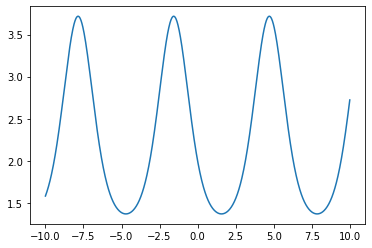

In [66]:
f = lambda x,y: (np.cos(x)*(1-y))
y = lambda x: 1 + math.e**(-np.sin(x))
x = np.linspace (-10, 10, 1000)

plt.plot(x,y(x))

**Euler's Method**

We use Euler's method to estimate values of our differential equation used above. 

First lets approximate the solution by computing next value using
$$
y_{i+1} = y_i + f(x_i,y_i)h
$$
for h the step size, $h = x_{i+1}-x_i$.

Now, we create Eluer method funciton:

In [67]:
def eulerMethod(function,initial,interval):
  array = []
  y=initial
  h = interval[1]-interval[0]
  for i in interval:
    array.append([y])
    y = y + f(i,y)*h
  return np.array(array)




In [68]:
mysol = eulerMethod(f,2,x)


Text(0.5, 1.0, 'Comparing Differential and Euler function')

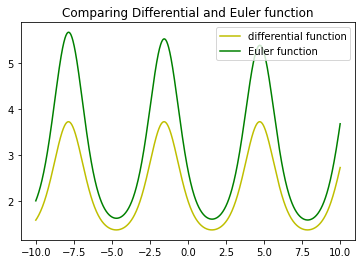

In [69]:
plt.plot(x, y(x),'y', label="differential function")
plt.plot(x, mysol, 'g', label="Euler function")
plt.legend()
plt.title("Comparing Differential and Euler function")


**Runge_Kutta 4th Order**


As in Euler's method we will utilize another method here for the form of $\frac{dy}{dx}= f(x,y)$.  We will be given an initial point and iterate to the next point using
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$

In [70]:
def rungeKutta(function, initial, interval):
  h = interval[1]-interval[0]
  y = initial
  sol = []
  for i in interval:
    sol.append([y])
    k1 = function(i,y)
    k2 = function(i+h/2,y+k1*h/2)
    k3 = function(i+ h/2,y+k2*h/2)
    k4 = function(i+ h , y+k3*h)
    y = y+h/6*(k1+2*k2+2*k3+k4)
  return np.array(sol)

In [71]:
rsol = rungeKutta(f,2,x)

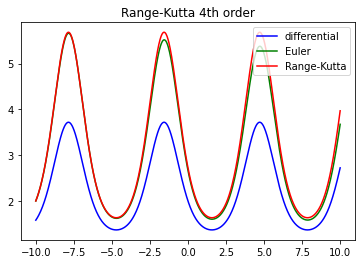

In [72]:
plt.plot(x, y(x),'b',label = "differential")
plt.plot(x, mysol,'g',label = "Euler")
plt.plot(x,rsol,'r', label= "Range-Kutta")
plt.title("Range-Kutta 4th order")
plt.legend()


Now to compute the error: